In [9]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, cross_val_score

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# Data preparing

In [87]:
kf = KFold(n_splits=25, shuffle=True, random_state=42)
#cross_val_score(model, X, y, cv=kf, scoring='accuracy')

train_dataset = pd.read_csv('perceptron-train.csv', header=None)
test_dataset = pd.read_csv('perceptron-test.csv', header=None)

X_train = train_dataset.loc[:199,1]
y_train = train_dataset.loc[:199,2]

X_test = test_dataset.loc[:,1]
y_test = test_dataset.loc[:,2]

train_date = pd.date_range('1/1/2011', periods=200, freq='H') # just random
last_train_date = train_date[-1]
test_date = pd.date_range(last_train_date, periods=200, freq='H')

X_train.index = pd.DatetimeIndex(train_date)
y_train.index = pd.DatetimeIndex(train_date)

X_test.index = pd.DatetimeIndex(test_date)
y_test.index = pd.DatetimeIndex(test_date)

# <span style="color:red">Testing common SARIMAX algo</span>

/usr/lib64/python2.7/site-packages/statsmodels-0.8.0-py2.7-linux-x86_64.egg/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


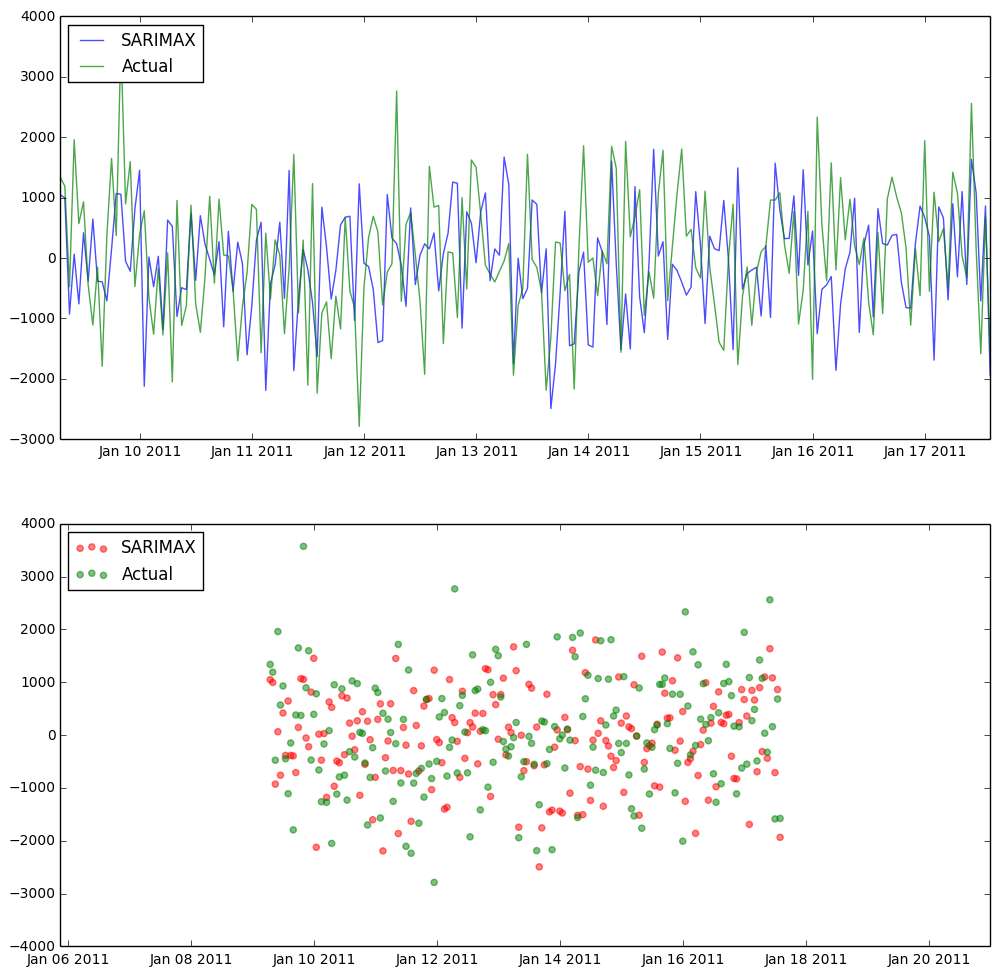

In [246]:
X_train.index = pd.DatetimeIndex(X_train.index)
y_train.index = pd.DatetimeIndex(y_train.index)

sarimax_model = sm.tsa.SARIMAX(X_train,y_train)
sarimax_model = sarimax_model.fit()

sarimax_prediction = np.array(list(sarimax_model.predict(exog=X_test)))*20896
test_date = np.array(test_date)

fig0 = plt.figure(figsize=(12,12))
a211 = fig0.add_subplot(211)
a211.plot(test_date, sarimax_prediction, color='blue', label='SARIMAX', alpha=0.7)
a211.plot(test_date, y_test, color='green', label='Actual', alpha=0.7)
a211.legend(loc='upper left')
a212 = fig0.add_subplot(212)
a212.scatter(test_date, sarimax_prediction, color='red', label='SARIMAX', alpha=0.5)
a212.scatter(test_date, y_test, color='green', label='Actual', alpha=0.5)
a212.legend(loc='upper left')
plt.show()

In [197]:
def count_relative_accuracy(predicted,actual):
    EPS = 200 # 1% value of error
    succes_counter = 0
    whole_size = len(actual)
    for i in range(len(actual)):
        if np.abs(predicted[i] - actual[i]) < EPS:
            succes_counter += 1
    return str(float(succes_counter)/whole_size*100)+'%'

sarimax_accuracy = np.mean(np.abs(np.array(y_test.values) - sarimax_prediction))
print sarimax_accuracy
print np.max(np.abs((np.array(y_test.values) - sarimax_prediction)))
print np.min(np.abs(np.array(y_test.values) - sarimax_prediction))
print count_relative_accuracy(sarimax_prediction,np.array(y_test.values))

1044.49369974
4016.56167501
0.509404769509
15.0%


# <span style="color:red">Custom model: SARIMAX + logreg</span>

In [198]:
i = 1
acc = -1
sarimax_prediction /= 20000
while True:
    sarimax_prediction *= i
    curr = count_relative_accuracy(sarimax_prediction,np.array(y_test.values))
    if acc > curr:
        print i
        break
    acc = curr
    i += 1

7


# Time series decomposition

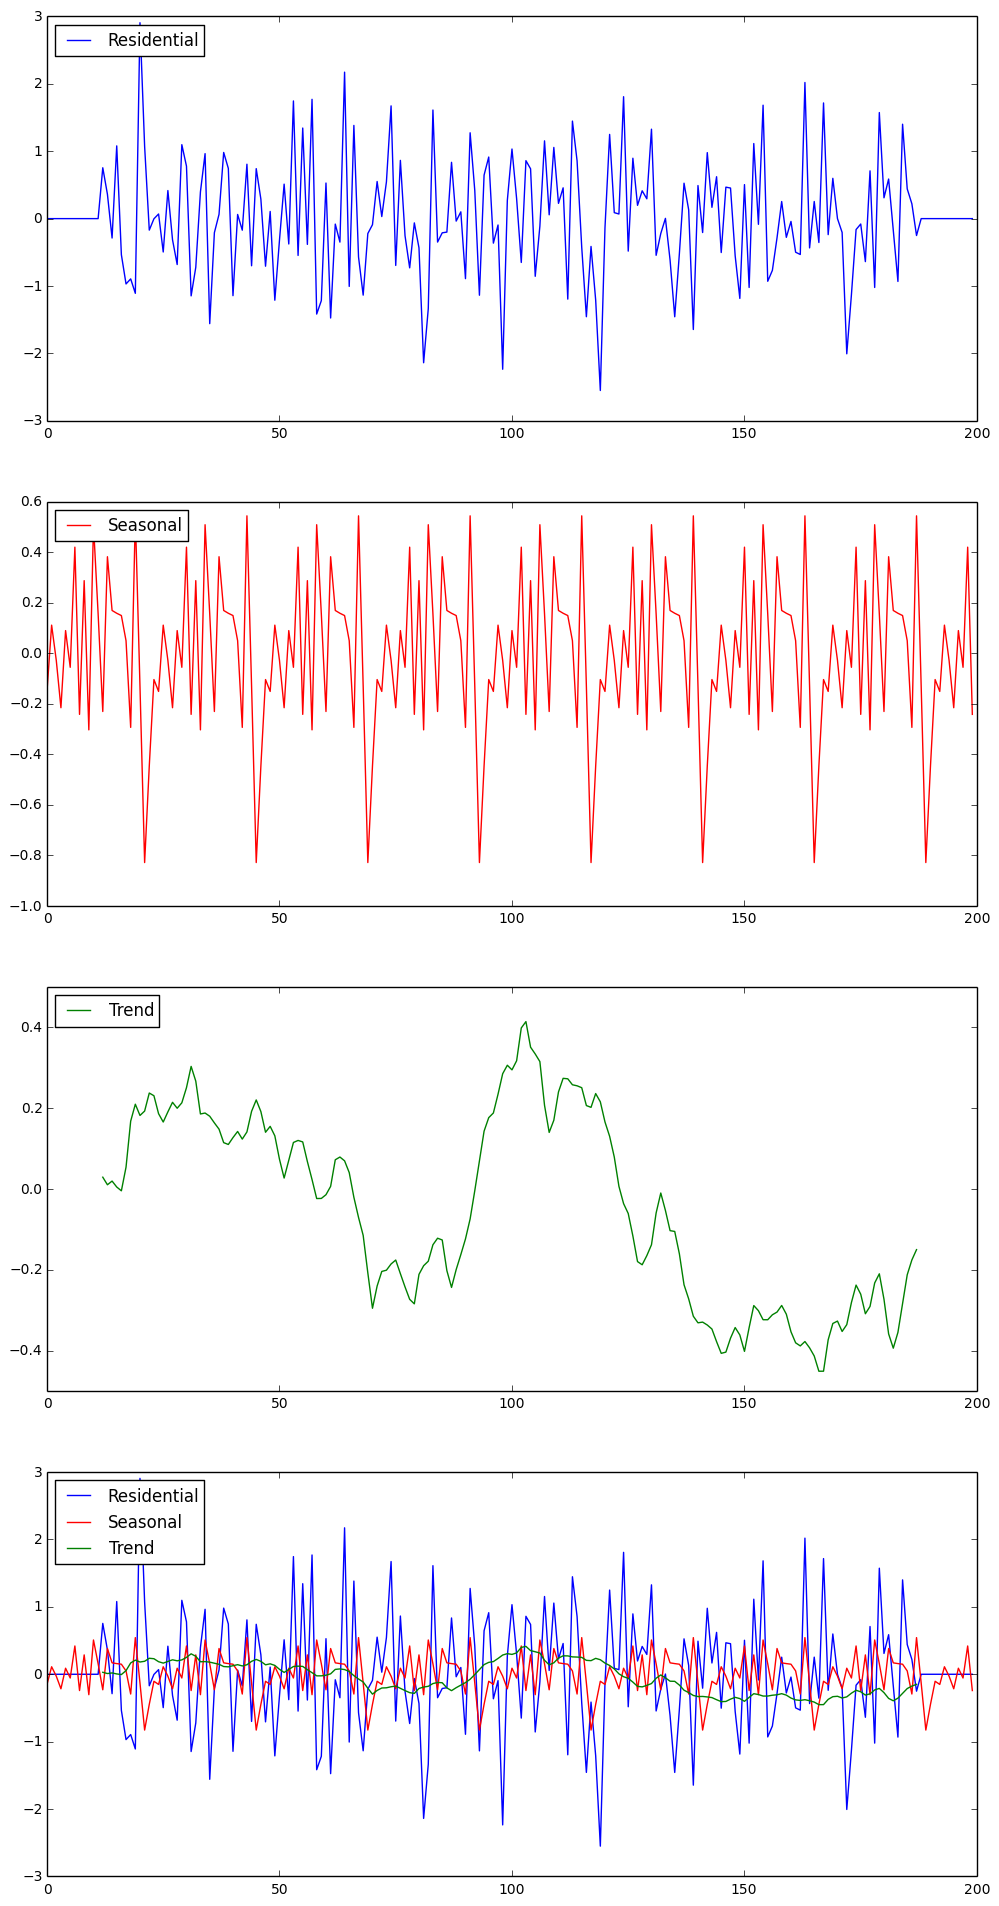

In [245]:
decomposed_X_test = sm.tsa.seasonal_decompose(X_test)
decomposed_X_test.resid.fillna(value=0, inplace=True)

fig = plt.figure(figsize=(12,24))
f411 = fig.add_subplot(411)
f411.plot(decomposed_X_test.resid, color="blue", label='Residential')
f411.legend(loc='upper left')
f412 = fig.add_subplot(412)
f412.plot(decomposed_X_test.seasonal, color="red", label='Seasonal')
f412.legend(loc='upper left')
f413 = fig.add_subplot(413)
f413.plot(decomposed_X_test.trend, color="green", label='Trend')
f413.legend(loc='upper left')
f414 = fig.add_subplot(414)
f414.plot(decomposed_X_test.resid, color="blue", label='Residential')
f414.plot(decomposed_X_test.seasonal, color="red", label='Seasonal')
f414.plot(decomposed_X_test.trend, color="green", label='Trend')
f414.legend(loc='upper left')
plt.show()